In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

In [72]:
# Empty lists to store data
temp = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
c_coord = []
c_lat=[]
c_lon=[]

# Call weather API

# Set basics of API call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key + "&q="

city_count = 1
success = 0
fail = 0

for city in cities:
    
    # Define query
    query_url = url + city
    
    # Print to terminal
    print(f"Getting city {city_count}: {city}")
    city_count = city_count+1
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    try:
        temp.append(weather_json['main']['temp'])
        maxtemp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        c_coord.append(weather_json['coord'])
        c_lat.append(weather_json['coord']['lat'])
        c_lon.append(weather_json['coord']['lon'])
        success = success+1
    except KeyError: 
        print("City not found")
        # Still need to add empty data to lists to keep in sync
        temp.append(None)
        maxtemp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        windspeed.append(None)
        c_coord.append(None)
        c_lat.append(None)
        c_lon.append(None)
        fail = fail+1
        
    # Rate limit is 60 per minute, so add a sleep() call of 1 second after each request
    time.sleep(1)

print(f"{success} cities added, {fail} not added")

Getting city 1: yumen
Getting city 2: bredasdorp
Getting city 3: coihaique
Getting city 4: constitucion
Getting city 5: nanortalik
Getting city 6: cape town
Getting city 7: kapaa
Getting city 8: rikitea
Getting city 9: ostrovnoy
Getting city 10: pak phanang
Getting city 11: atambua
Getting city 12: zyryanovsk
Getting city 13: ribeira grande
Getting city 14: port said
Getting city 15: luderitz
Getting city 16: urumqi
Getting city 17: chokurdakh
Getting city 18: belle fourche
Getting city 19: upernavik
Getting city 20: nikolskoye
Getting city 21: kamenskoye
City not found
Getting city 22: ahumada
City not found
Getting city 23: chuy
Getting city 24: mahebourg
Getting city 25: russell
Getting city 26: mabaruma
Getting city 27: sitka
Getting city 28: damphu
Getting city 29: loikaw
Getting city 30: key west
Getting city 31: bengkulu
Getting city 32: atuona
Getting city 33: golden
Getting city 34: nome
Getting city 35: port elizabeth
Getting city 36: port lincoln
Getting city 37: roald
Getti

Getting city 294: port macquarie
Getting city 295: nuuk
Getting city 296: shaki
Getting city 297: besikduzu
Getting city 298: khani
Getting city 299: olafsvik
Getting city 300: thilogne
City not found
Getting city 301: mumbwa
Getting city 302: kampene
Getting city 303: grindavik
Getting city 304: saldanha
Getting city 305: anadyr
Getting city 306: kocerin
Getting city 307: granja
Getting city 308: datong
Getting city 309: kabalo
Getting city 310: mehamn
Getting city 311: windsor
Getting city 312: nguiu
City not found
Getting city 313: bow island
Getting city 314: sungairaya
Getting city 315: belem de sao francisco
Getting city 316: college
Getting city 317: oriximina
Getting city 318: konyshevka
Getting city 319: broome
Getting city 320: varhaug
Getting city 321: bazarnyye mataki
Getting city 322: bud
Getting city 323: kaitangata
Getting city 324: bardstown
Getting city 325: ngukurr
City not found
Getting city 326: tura
Getting city 327: prudentopolis
Getting city 328: longyearbyen
Get

Getting city 581: boca do acre
Getting city 582: lasa
Getting city 583: moron
Getting city 584: massakory
Getting city 585: morant bay
Getting city 586: okhotsk
Getting city 587: ballina
Getting city 588: ilulissat
Getting city 589: namie
Getting city 590: churapcha
Getting city 591: hambantota
Getting city 592: ushtobe
Getting city 593: mana
Getting city 594: mahibadhoo
Getting city 595: avera
Getting city 596: beysehir
Getting city 597: ambilobe
Getting city 598: ukiah
Getting city 599: puerto penasco
Getting city 600: lompoc
Getting city 601: la mira
Getting city 602: markova
Getting city 603: roebourne
Getting city 604: sar-e pul
Getting city 605: darnah
Getting city 606: malwan
City not found
Getting city 607: alta floresta
Getting city 608: jaque
Getting city 609: sahrak
City not found
Getting city 610: pisco
Getting city 611: sambava
Getting city 612: aklavik
Getting city 613: soligalich
Getting city 614: chagda
City not found
Getting city 615: shirgaon
Getting city 616: cascais

In [73]:
# Create dataframe
city_wthr = pd.DataFrame( {
            'City' : cities,
            'Lat' : c_lat,
            'Lon' : c_lon,
            'Temp' : temp,
            'Humidity' : humidity,
            'Cloudiness' : cloudiness,
            'Wind Speed' : windspeed
}, dtype='float')
print(city_wthr.dtypes)
city_wthr.head(10)

City           object
Lat           float64
Lon           float64
Temp          float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
dtype: object


,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,yumen,40.2833,97.2000,85.44,14.0,9.0,6.55
1,bredasdorp,-34.5322,20.0403,70.92,35.0,3.0,10.36
2,coihaique,-45.5752,-72.0662,37.35,75.0,75.0,3.44
3,constitucion,-35.3333,-72.4167,43.50,65.0,0.0,9.42
4,nanortalik,60.1432,-45.2371,45.28,80.0,100.0,1.30
5,cape town,-33.9258,18.4232,62.74,63.0,75.0,3.00
6,kapaa,22.0752,-159.3190,74.93,81.0,75.0,14.97
7,rikitea,-23.1203,-134.9692,74.46,76.0,100.0,17.67
8,ostrovnoy,68.0531,39.5131,48.67,78.0,73.0,15.77
9,pak phanang,8.3511,100.2020,87.82,69.0,6.0,13.87


In [79]:
print(city_wthr.shape)
# Drop rows with unfound cities
city_wther = city_wthr.dropna()
print(city_wther.shape)
city_wther.dtypes

(617, 7)
(575, 7)


City           object
Lat           float64
Lon           float64
Temp          float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
dtype: object

In [80]:
city_wther.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,21.750389,16.313155,70.929670,67.587826,55.466087,8.178591
std,32.949550,89.222959,14.689289,22.845311,40.504336,5.687574
min,-54.800000,-175.200000,34.050000,1.000000,0.000000,0.000000
25%,-5.211750,-60.456550,60.560000,54.500000,8.000000,3.845000
50%,27.896400,21.900700,73.490000,73.000000,69.000000,6.910000
75%,50.126500,87.925000,81.040000,85.000000,99.000000,11.500000
max,78.218600,179.316700,111.180000,100.000000,100.000000,31.320000


In [46]:
# Save CSVs
city_wthr.to_csv("output/all_cities.csv")
city_wther.to_csv("output/city_weather.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

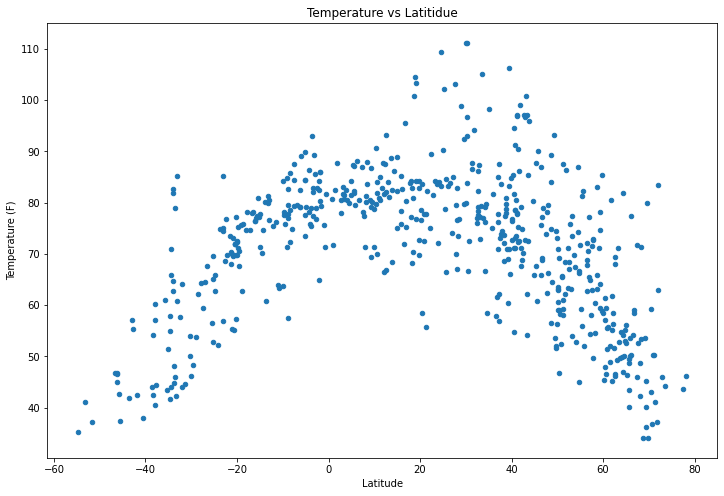

In [106]:
## Scatter plots

# Temperature vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Temp', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitidue")
plt.savefig("output/temp_lat.png", format='png')
plt.show

The plot shows temperature (F) vs Latitude, with the temperature being the current temperatures of cities obtained at the time of running the data. This shows that cities at extremes of latitude are generally cooler than those closer to the equator

<function matplotlib.pyplot.show(close=None, block=None)>

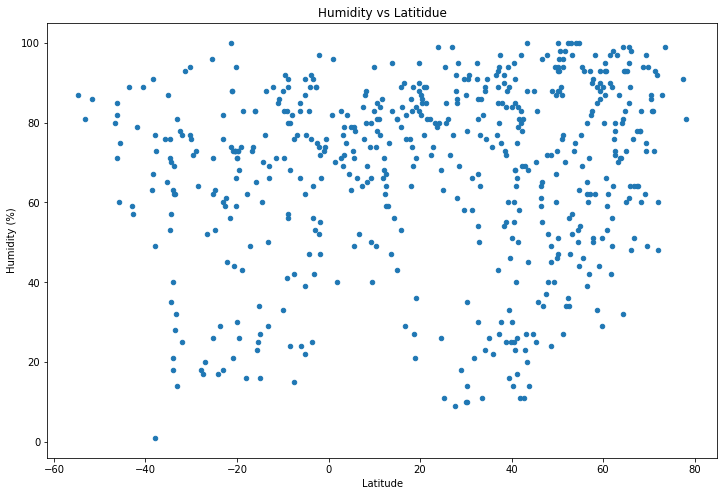

In [107]:
# Humidity vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Humidity', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitidue")
plt.savefig("output/humidity_lat.png", format='png')
plt.show

This plot shows humidity vs latitude, again for the current humidity readings at the time of extracting the data. There are no obvious trends to be drawn from this data.

<function matplotlib.pyplot.show(close=None, block=None)>

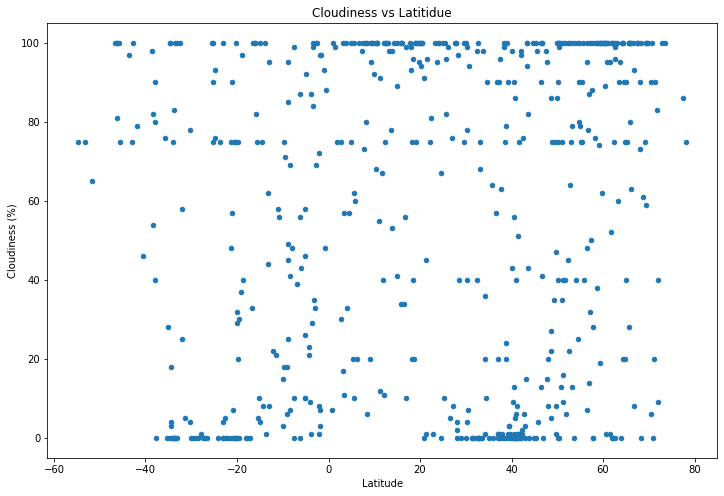

In [108]:
# Cloudiness vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitidue")
plt.savefig("output/cloud_lat.png", format='png')
plt.show

This shows cloudiness vs latitude, again using current data. There are no obvious trends, but the number of cities with either 0 or 100% cloud cover is noted, and would be worth further investigation to rule out data errors.

<function matplotlib.pyplot.show(close=None, block=None)>

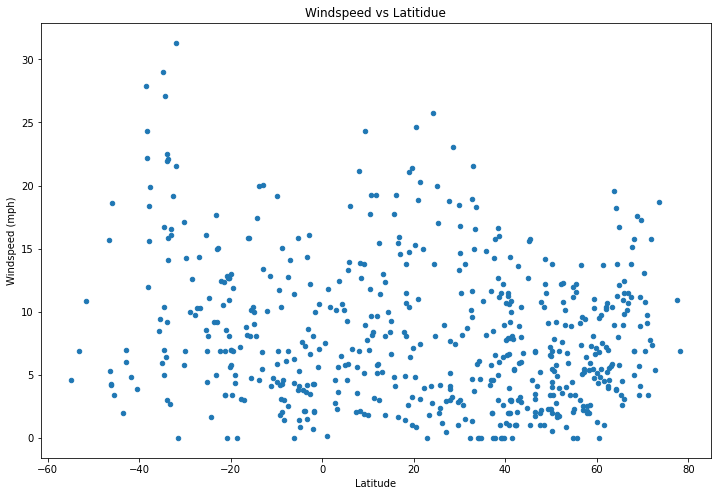

In [109]:
# Windspeed vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title("Windspeed vs Latitidue")
plt.savefig("output/wind_lat.png", format='png')
plt.show

This plot shows (current) windspeed against latitutde. There are no obvious trends to be drawn from this data.

In [82]:
## Linear regression

northern = city_wther[city_wther['Lat'] >= 0]
southern = city_wther[city_wther['Lat'] < 0]
print(northern.shape)
print(southern.shape)

(402, 7)
(173, 7)


In [87]:
# Calculate linear regressions
nt_temp_rg = linregress(northern['Lat'], northern['Temp'])
nt_humd_rg = linregress(northern['Lat'], northern['Humidity'])
nt_clod_rg = linregress(northern['Lat'], northern['Cloudiness'])
nt_wind_rg = linregress(northern['Lat'], northern['Wind Speed'])
st_temp_rg = linregress(southern['Lat'], southern['Temp'])
st_humd_rg = linregress(southern['Lat'], southern['Humidity'])
st_clod_rg = linregress(southern['Lat'], southern['Cloudiness'])
st_wind_rg = linregress(southern['Lat'], southern['Wind Speed'])

regressions = pd.DataFrame([nt_temp_rg, nt_humd_rg, nt_clod_rg, nt_wind_rg, st_temp_rg, st_humd_rg, st_clod_rg, st_wind_rg],
                          index=['Northern Temp', 'Northern Humidity', 'Northern Cloudiness', 'Northern Wind Speed',
                                'Southern Temp', 'Southern Humidity', 'Southern Cloudiness', 'Southern Wind Speed'])
regressions

,slope,intercept,rvalue,pvalue,stderr
Northern Temp,-0.477661,91.169277,-0.634023,1.378073e-46,0.029130
Northern Humidity,0.047678,67.610004,0.041564,4.059111e-01,0.057307
Northern Cloudiness,-0.007139,59.821794,-0.003458,9.448979e-01,0.103225
Northern Wind Speed,-0.027602,8.799462,-0.101652,4.164549e-02,0.013507
Southern Temp,0.857439,85.540080,0.813386,4.364227e-42,0.046895
Southern Humidity,0.031376,63.758497,0.018211,8.120312e-01,0.131735
Southern Cloudiness,-0.261579,40.694216,-0.089841,2.398000e-01,0.221753
Southern Wind Speed,-0.150967,6.226300,-0.319241,1.859825e-05,0.034271


Correlations (with rvalue being closer to 1 and pvalue being less than 0.05) are noted as follows:
- Temperature : strong correlation
- Humidity : no correlation
- Cloudiness : no correlation
- Wind speed : weak correlation in the southern hemisphere

<function matplotlib.pyplot.show(close=None, block=None)>

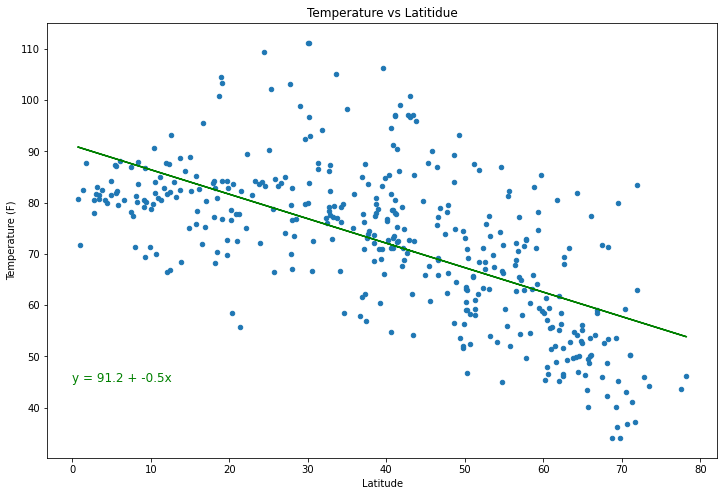

In [110]:
# New plots

# Northern temperature
regress_slope = nt_temp_rg[0]
regress_icept = nt_temp_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Temp', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(0,45),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitidue")
plt.savefig("output/temp_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

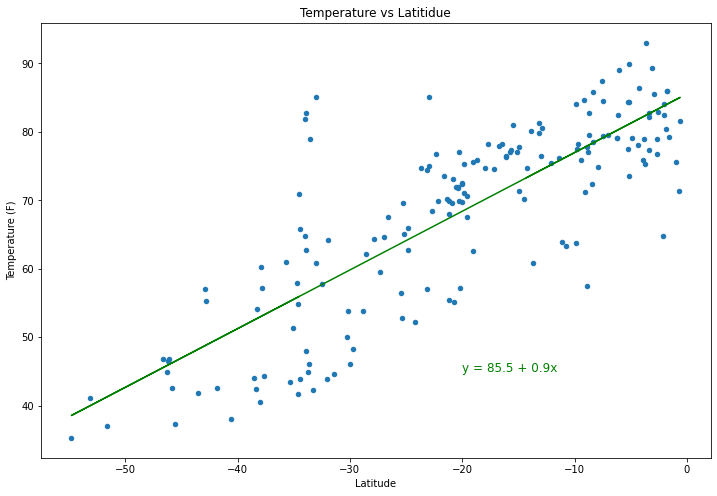

In [111]:
# Southern temperature
regress_slope = st_temp_rg[0]
regress_icept = st_temp_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Temp', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-20,45),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitidue")
plt.savefig("output/temp_southern.png", format='png')
plt.show

These plots show the very strong and clear correlation between latitude and temperature, although there is a significant amount of variation in the data, implying that latitude is only one of several factors contributing to temperature.

<function matplotlib.pyplot.show(close=None, block=None)>

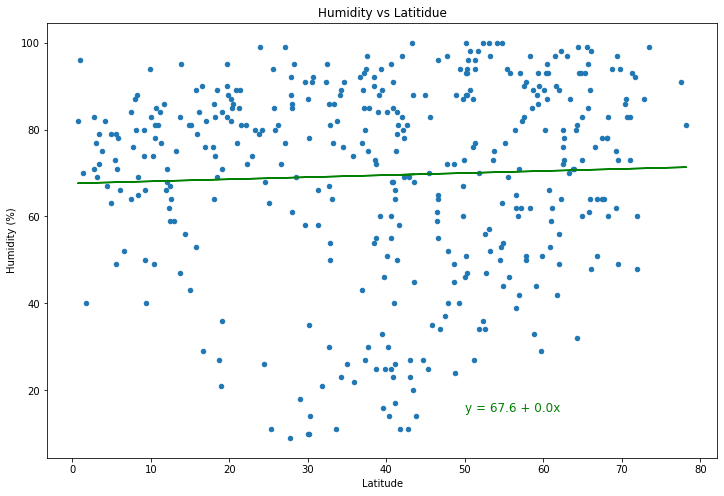

In [112]:
# Northern humidity
regress_slope = nt_humd_rg[0]
regress_icept = nt_humd_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Humidity', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(50,15),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitidue")
plt.savefig("output/humidity_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

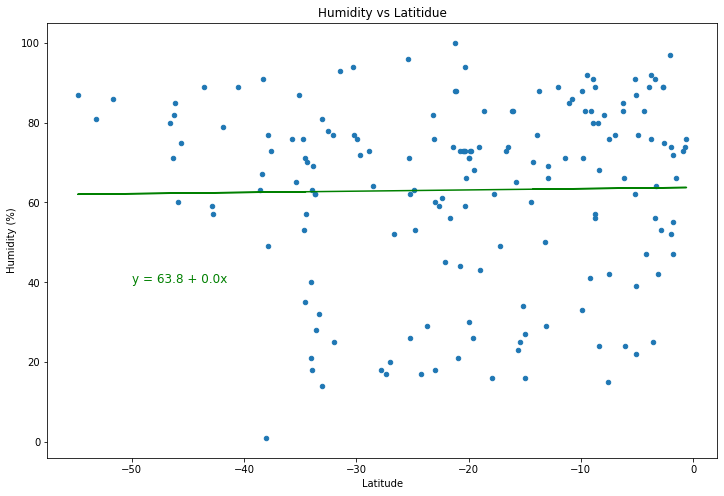

In [113]:
# Southern humidity
regress_slope = st_humd_rg[0]
regress_icept = st_humd_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Humidity', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-50,40),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitidue")
plt.savefig("output/humidity_southern.png", format='png')
plt.show

These plots show no correlation between latitude and humidity

<function matplotlib.pyplot.show(close=None, block=None)>

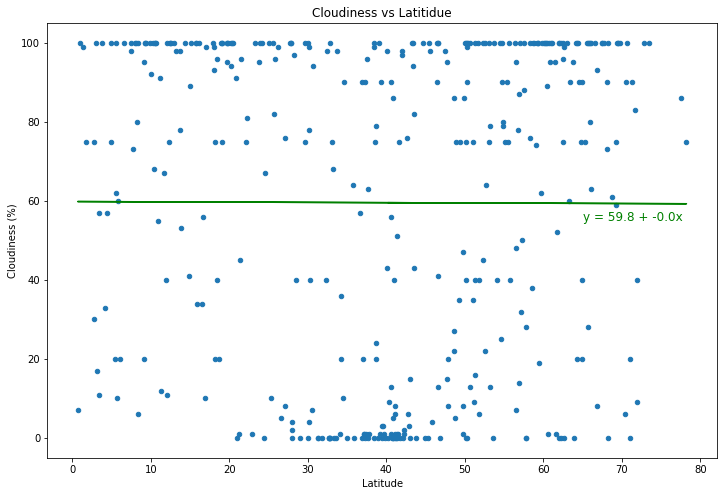

In [116]:
# Northern cloudiness
regress_slope = nt_clod_rg[0]
regress_icept = nt_clod_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(65,55),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitidue")
plt.savefig("output/cloud_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

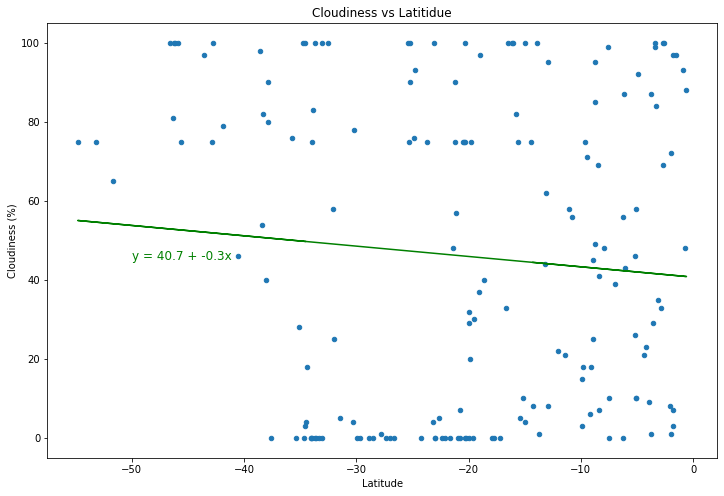

In [117]:
# Southern cloudiness
regress_slope = st_clod_rg[0]
regress_icept = st_clod_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-50,45),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitidue")
plt.savefig("output/cloud_southern.png", format='png')
plt.show

These plots show no correlation between cloudiness and latitude

<function matplotlib.pyplot.show(close=None, block=None)>

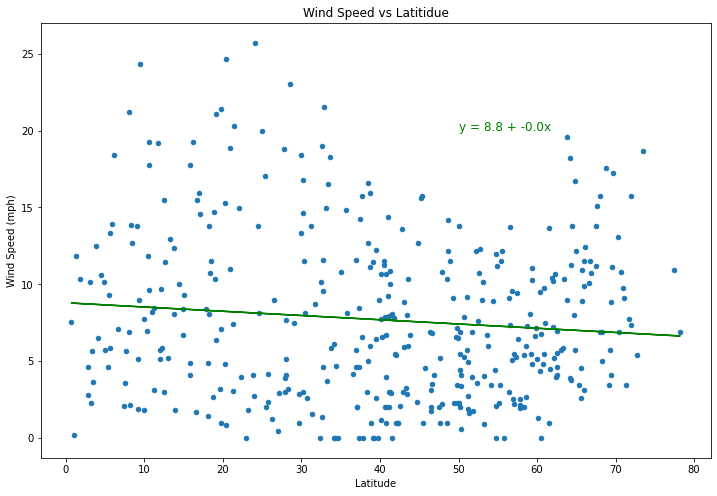

In [118]:
# Northern wind speed
regress_slope = nt_wind_rg[0]
regress_icept = nt_wind_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(50,20),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitidue")
plt.savefig("output/wind_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

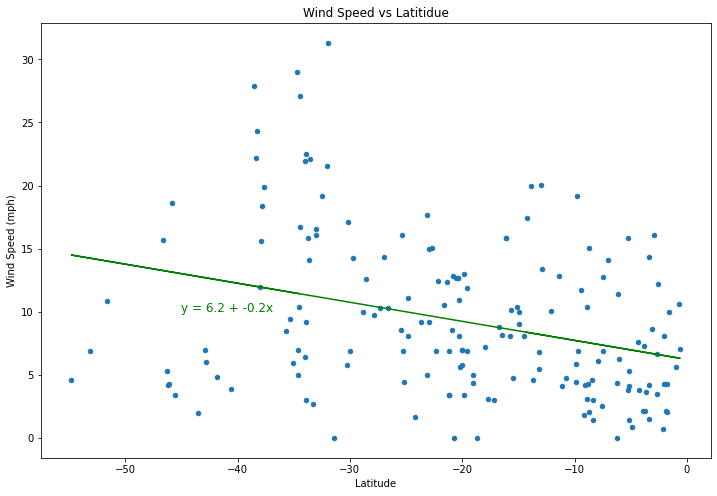

In [119]:
# Southern cloudiness
regress_slope = st_wind_rg[0]
regress_icept = st_wind_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-45,10),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitidue")
plt.savefig("output/wind_southern.png", format='png')
plt.show

These plots show a weak correlation between wind speed and latitude in the southern hemisphere, with no correlation in the northern hemisphere.